# Cosmic Inflation  
Assume space is completely flat so $k = 0$, and set $R(t) = 1$ at the present time. The Friedmann equations are :  

$$ 
H^2 = \left( \frac{\dot{R}}{R} \right)^2 = \frac{8\pi G}{3}\rho
$$  
and  
$$ 
\dot{H} + H^2 = \left( \frac{\ddot{R}}{R} \right) = -\frac{4\pi G}{3} (1 + 3w) \rho
$$  
along with 
$$
\dot{\rho} = -3H\rho(1 + w)\rho
$$ 

These eqautions can we re-written as : 
$$ 
\dot{R} = \sqrt{\frac{8\pi G}{3}\rho}R 
$$   
$$ 
\ddot{R} = -\frac{4\pi G}{3} (1 + 3w) \rho R
$$  
$$
\dot{\rho} = -3\sqrt{\frac{8\pi G}{3}}\rho^{\frac{3}{2}}(1 + w)
$$ 


In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize


In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
params_friedmann1 = {
    'method':'RK45',
    'tmax':200.,
    'R_init':1.0,
    'dR_init':1.0,
    'rho_init':1.0,
    'G':1.0,
    'w':0.0
}

params_friedmann2 = {
    'method':'RK45',
    'tmax':200.,
    'R_init':1.0,
    'dR_init':1.0,
    'rho_init':1.0,
    'G':1.0,
    'w':1.0
}

params_friedmann3 = {
    'method':'RK45',
    'tmax':200.,
    'R_init':1.0,
    'dR_init':1.0,
    'rho_init':1.0,
    'G':1.0,
    'w':-1.0/3.0
}

In [4]:
class Friedmann:
    def __init__ (self, params ):
        self.params=params
        for iparam,param in params.items():
            setattr(self, iparam, params[iparam])

    def set_param(self, parname, parval ):
        setattr( self, parname, parval )

    def __call__(self, t, state):
        flow = np.zeros_like(state)
        flow[0] = np.sqrt((8.0*np.pi*self.G)/(3.0))*np.sqrt(state[2])*state[0]
        flow[1] = -((4.0*np.pi*self.G)/(3.0))*(1 + 3.0*self.w)*state[2]*state[0] 
        flow[2] = -3.0*np.sqrt((8.0*np.pi*self.G)/3.0)*(1 + self.w)*state[2]**(3.0/2.0)
        return flow

## Case : $w = 0$

In [5]:
fmann = Friedmann(params_friedmann1)

res = scipy.integrate.solve_ivp(fun=fmann,t_span=(0,fmann.tmax),
                                y0=[fmann.R_init, fmann.dR_init, fmann.rho_init], 
                                vectorized=True, 
                                atol=1e-8,rtol=1e-6,
                                method=fmann.method,
                                first_step = 0.001)
#scipy.integrate.solve_ivp
t = res.t
states=res.y
R = states[0]
dR = states[1]
rho = states[2]
#rho = states[2]

R_anal = np.power(np.sqrt(6*np.pi)*(1+params_friedmann1['w']),(2.0/(3.0*(1+params_friedmann1['w']))))*t**(2.0/(3.0*(1+params_friedmann1['w'])))

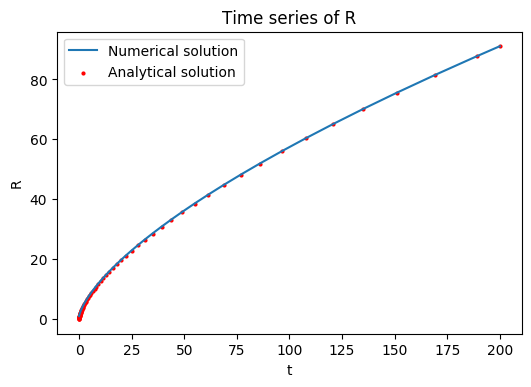

In [6]:
plt.plot(t,R,label="Numerical solution")
plt.scatter(t,R_anal, color = 'red' , s = 4.0,  label="Analytical solution")
plt.title(r"Time series of R")
plt.xlabel("t")
plt.ylabel("R")
plt.legend()
plt.savefig("P4-1.pdf")
plt.show()

## Case : $w = 1/3$ 

In [7]:
fmann = Friedmann(params_friedmann2)

res = scipy.integrate.solve_ivp(fun=fmann,t_span=(0,fmann.tmax),
                                y0=[fmann.R_init, fmann.dR_init, fmann.rho_init], 
                                vectorized=True, 
                                atol=1e-8,rtol=1e-6,
                                method=fmann.method,
                                first_step = 0.001)
#scipy.integrate.solve_ivp
t = res.t
states=res.y
R = states[0]
dR = states[1]
rho = states[2]
#rho = states[2]

R_anal = np.power(np.sqrt(6*np.pi)*(1+params_friedmann2['w']),(2.0/(3.0*(1+params_friedmann2['w']))))*t**(2.0/(3.0*(1+params_friedmann2['w'])))

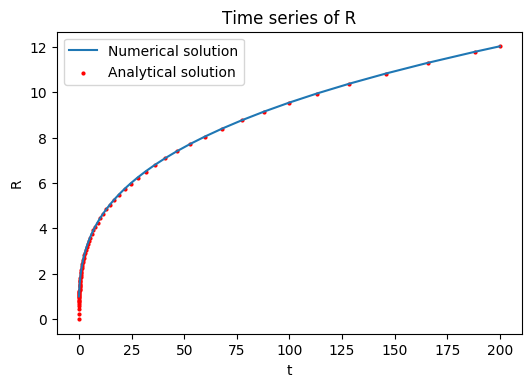

In [8]:
#R_anal = (2.0*dR[0]/R[0])**(1/2)*t**(1/2) 
plt.plot(t,R,label="Numerical solution")
plt.scatter(t,R_anal, color = 'red' , s = 4.0,  label="Analytical solution")
plt.title(r"Time series of R")
plt.xlabel("t")
plt.ylabel("R")
plt.legend()
plt.savefig("P4-2.pdf")
plt.show()

## Case : $w = -1$ 

In [9]:
fmann = Friedmann(params_friedmann3)

res = scipy.integrate.solve_ivp(fun=fmann,t_span=(0,fmann.tmax),
                                y0=[fmann.R_init, fmann.dR_init, fmann.rho_init], 
                                vectorized=True, 
                                atol=1e-8,rtol=1e-6,
                                method=fmann.method,
                                first_step = 0.001)
#scipy.integrate.solve_ivp
t = res.t
states=res.y
R = states[0]
dR = states[1]
rho = states[2]
#rho = states[2]

R_anal = np.power(np.sqrt(6*np.pi)*(1+params_friedmann3['w']),(2.0/(3.0*(1+params_friedmann3['w']))))*t**(2.0/(3.0*(1+params_friedmann3['w'])))

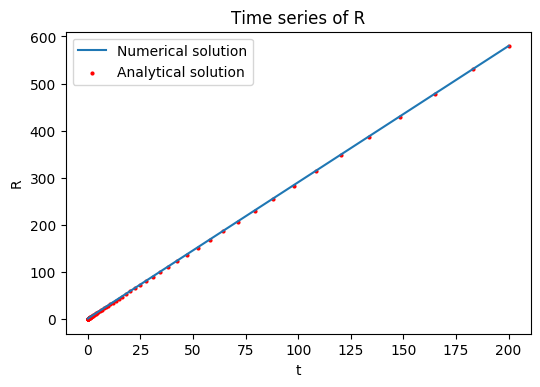

In [10]:
#R_anal = np.exp(t)
plt.plot(t,R,label="Numerical solution")
plt.scatter(t,R_anal, color = 'red' , s = 4.0,  label="Analytical solution")
plt.title(r"Time series of R")
plt.xlabel("t")
plt.ylabel("R")
plt.legend()
plt.savefig("P4-3.pdf")
plt.show()